In [242]:
import cv2
import asociation
import matplotlib.pyplot as plt
import importlib


# Recarga el módulo para que se reflejen los cambios
importlib.reload(asociation)

<module 'asociation' from 'c:\\Users\\abeld\\Desktop\\github\\label-ocr\\asociation.py'>

In [243]:
fields = ['part n (p)', 'cantidad', 'proveedor', 'descripcion', 
            'lote H', 'serie(s)', 'ref. pdl', 'op:', 'fecha']

labelocr = asociation.LabelORCR(fields, verbose = True)

[2024/10/21 23:33:24] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\abeld/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\abeld/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=

In [244]:
path = 'images/pladomin/pladomin6.jpg'
img = cv2.imread(path)

In [245]:
# Procesar el frame
labelocr.inferenciar_imagen(img)

[2024/10/21 23:33:25] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/10/21 23:33:25] ppocr DEBUG: dt_boxes num : 21, elapsed : 0.06911301612854004
[2024/10/21 23:33:25] ppocr DEBUG: rec_res num  : 21, elapsed : 0.46546077728271484
Umbral de distancia: 0.4
Mejor parecido: 
 	 Field: part n (p) 
 	 Deteccion:  part n P): 
 	 Distancia:  0.2
Mejor parecido: 
 	 Field: cantidad 
 	 Deteccion:  cantidad (Q): 
 	 Distancia:  0.38461538461538464
Mejor parecido: 
 	 Field: proveedor 
 	 Deteccion:  proveedor (V): 
 	 Distancia:  0.35714285714285715
Mejor parecido: 
 	 Field: descripcion 
 	 Deteccion:  descripcion: 
 	 Distancia:  0.08333333333333333
Mejor parecido: 
 	 Field: lote H 
 	 Deteccion:  Lote (H): 
 	 Distancia:  0.3333333333333333
Mejor parecido: 
 	 Field: serie(s) 
 	 Deteccion:  Serie(S): 
 	 Distancia:  0.1111111111111111
Mejor parecido: 
 	 Field: ref. pdl 
 	 Deteccion:  Ref.PLD 
 	 Distancia:  0.375
Mejor p

In [246]:
import Levenshtein


In [247]:
w1 = 'serie(s)'
w2 = 'Serie(S):'
w2 = w2.lower()
distancia = Levenshtein.distance(w1, w2)
longitud_max = max(len(w1), len(w2))
distancia/longitud_max

0.1111111111111111

[]

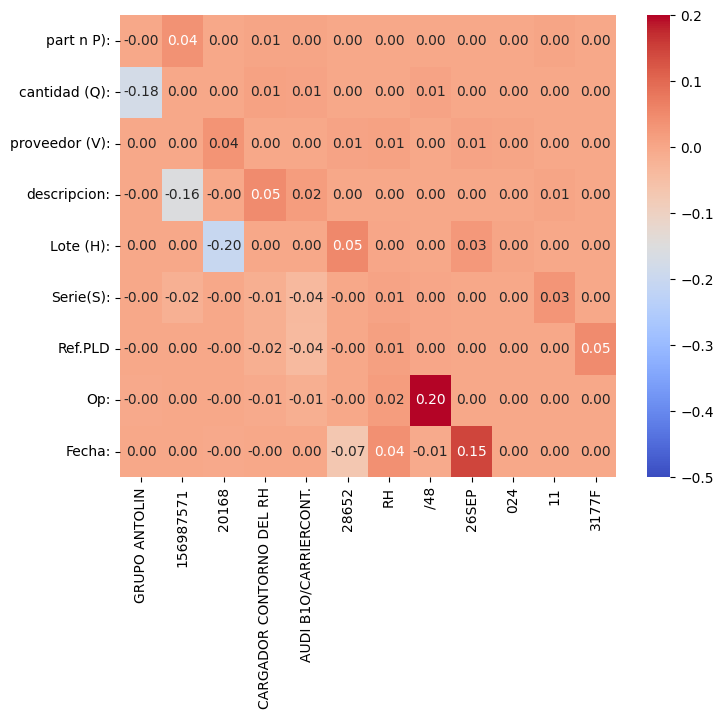

In [248]:
# Asociacion campo-valor:
fig, ax, heatmap = labelocr.plotear_matriz()
plt.plot()

In [249]:
# representacion de inferencia:
img_det = labelocr.dibujar_inferencia()
#bgr2rgb:
img_det[:,:, [0,1,2]] = img_det[:,:, [2,1,0]]

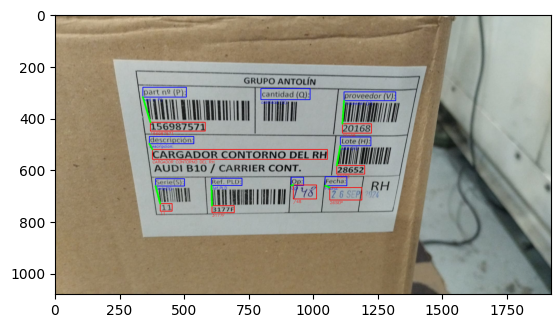

In [250]:
plt.imshow(img_det)
plt.show()

In [251]:
labelocr.asociados

{'part n (p)': {'det_field': [[[339.0, 282.0],
    [508.0, 286.0],
    [507.0, 320.0],
    [338.0, 315.0]],
   ('part n P):', 0.8179910778999329)],
  'det_value': [[[368.0, 417.0],
    [580.0, 417.0],
    [580.0, 451.0],
    [368.0, 451.0]],
   ('156987571', 0.9984107613563538)]},
 'cantidad': {'det_field': [[[795.0, 287.0],
    [986.0, 294.0],
    [985.0, 330.0],
    [794.0, 323.0]],
   ('cantidad (Q):', 0.9512034058570862)],
  'det_value': None},
 'proveedor': {'det_field': [[[1116.0, 300.0],
    [1316.0, 300.0],
    [1316.0, 334.0],
    [1116.0, 334.0]],
   ('proveedor (V):', 0.9428203701972961)],
  'det_value': [[[1110.0, 423.0],
    [1222.0, 423.0],
    [1222.0, 459.0],
    [1110.0, 459.0]],
   ('20168', 0.9983589053153992)]},
 'descripcion': {'det_field': [[[364.0, 472.0],
    [536.0, 472.0],
    [536.0, 500.0],
    [364.0, 500.0]],
   ('descripcion:', 0.9889707565307617)],
  'det_value': [[[376.0, 522.0],
    [1052.0, 526.0],
    [1052.0, 560.0],
    [376.0, 556.0]],
   ('CARGAD